# Pre-process Images 🏞️

**Raw data**: Chouhan, Siddharth Singh; Kaul, Ajay; Singh, Uday Pratap; Jain, Sanjeev (2019), “A Database of Leaf Images: Practice towards Plant Conservation with Plant Pathology”, Mendeley Data, V1, doi: [10.17632/hb74ynkjcn.1](http://dx.doi.org/10.17632/hb74ynkjcn.1).

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Image 📤

In [4]:
input_path = 'data/raw/'
label_to_name = {
    '0001' : 'Mango',
    '0007' : 'Pongamia Pinnata',
    '0008' : 'Basil',
    '0010' : 'Lemon'
}

# file_name = '0001_0001.JPG'
file_name = '0007_0026.JPG'
# file_name = '0010_0001.JPG'
# file_name = '0008_0001.JPG'

label = file_name[:4]

img = cv2.imread(input_path + file_name)

[ WARN:0@1193.449] global loadsave.cpp:248 findDecoder imread_('data/raw0007_0026.JPG'): can't open/read file: check file path/integrity


In [5]:
def plt_RGB(opencv_image):
    plt.imshow(cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB))

## Downsample

In [6]:
def downsample(img, scale): 
    height, width = img.shape[:2]
    new_width = int(width * scale)
    new_height = int(height * scale)
    return cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

k = 0.25
img_downsampled = downsample(img, k)
plt_RGB(img_downsampled)

AttributeError: 'NoneType' object has no attribute 'shape'

## Remove Excess Background

In [45]:
def remove_excess_background(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_green = (36, 25, 25)
    upper_green = (86, 255, 255)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    c = max(cont, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    
    return img[y:y+h, x:x+w]

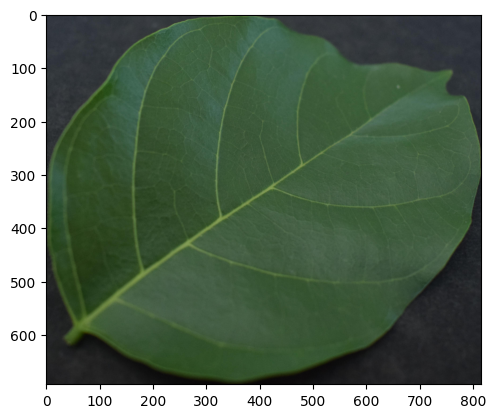

In [46]:
img_cropped = remove_excess_background(img_downsampled)
plt_RGB(img_cropped)

## Increase Contrast

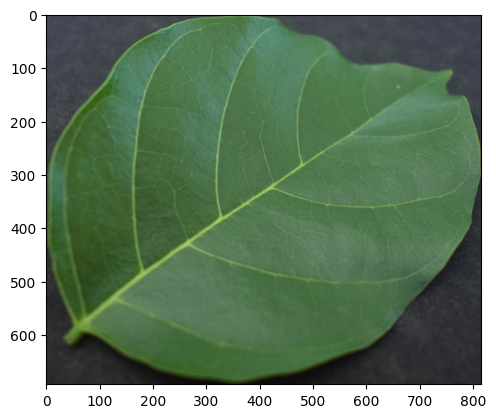

In [47]:
def contrast(img, alpha=1, beta=0):
    """
    :param alpha: contrast control (1.0-3.0)
    :param beta: brightness control (0-100)
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

alpha = 1.3
img_contrast = contrast(img_cropped, alpha=alpha)
plt_RGB(img_contrast)

## Save Image 📥

In [8]:
output_path = 'preprocessed_plant_leaves/'

cv2.imwrite(output_path + file_name, img_contrast)

True

---

# Pre-process All

In [9]:
import glob
import os

from tqdm.notebook import tqdm

In [11]:
file_paths = glob.glob(input_path + "/*.JPG")
file_names = [os.path.basename(file_name) for file_name in file_paths]

for file_name in tqdm(file_names):
    img = cv2.imread(input_path + file_name)
    img_downsampled = downsample(img, k)
    img_cropped = remove_excess_background(img_downsampled)
    img_contrast = contrast(img_cropped, alpha=alpha)
    cv2.imwrite(output_path + file_name, img_contrast)
    
print(f'Finished pre-processing {len(file_names)} images.')

  0%|          | 0/160 [00:00<?, ?it/s]

Finished pre-processing 160 images.


---

## Process visualisation

In [48]:
k = 0.25
img = downsample(img, k)
img_copy = img.copy()

In [ ]:
# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the green color range
lower_green = (36, 25, 25)
upper_green = (86, 255, 255)

# Create a mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Apply the mask to the image
result = cv2.bitwise_and(img, img, mask=mask)
plt_RGB(result)

In [ ]:
cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
c = max(cont, key=cv2.contourArea)
cont_img = cv2.drawContours(img, c, -1, 255, 5)

x, y, w, h = cv2.boundingRect(c)

cv2.rectangle(cont_img, (x,y), (x+w, y+h), (0,255,0), 10)

In [ ]:
cropped_image = img_copy[y:y+h, x:x+w]

In [52]:
alpha = 1.3
img_contrast = contrast(cropped_image, alpha=alpha)

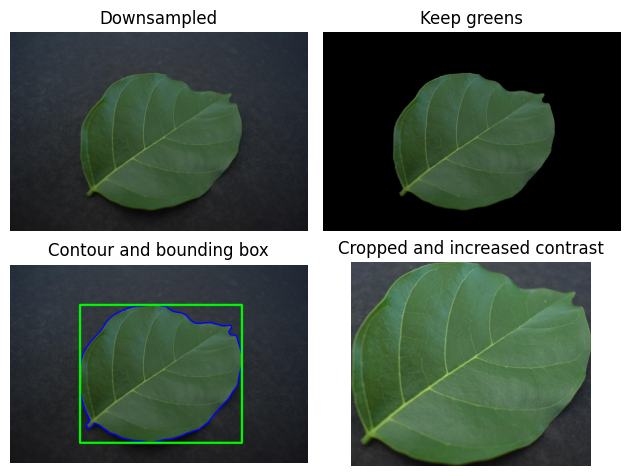

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Downsampled')
axs[0, 0].set_axis_off()
axs[0, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Keep greens')
axs[0, 1].set_axis_off()
axs[1, 0].imshow(cv2.cvtColor(cont_img, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Contour and bounding box')
axs[1, 0].set_axis_off()
axs[1, 1].imshow(cv2.cvtColor(img_contrast, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Cropped and increased contrast')
axs[1, 1].set_axis_off()

plt.tight_layout()
plt.savefig("plots/preproccess.pdf", format="pdf")
plt.show()